<h1 style="text-align: center">Start of Program</h1>

***
## Check if data suitable to move forward (categorical data)
***

In this program we are taking a sample university data where we have three fields (or variable). 
- <b>Name</b>: Name of the student.
- <b>Rank</b>: Rank of the student.
- <b>IsJob</b>: Whether the student got placed in the job. (this is the class variable)

***
<p style=" position: relative; bottom: 0; left: 0; width: 50%; text-align: left;"> Author >> Ashish Garg
<p style=" position: relative; bottom: 0; left: 0; width: 50%; text-align: left;"> Date >>   31 May 2021

In [41]:
# data manipulation libraries
import pandas as pd 
import numpy as np

# utility libraries
import math

# Use for encoding the variables to numbers
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Utility functions if any
***

In [ ]:
# Create your own Min Max function to restrict any numeric data within two values
def MinMaxAG(x, min = 0, max = 1):
    return max / ((x-min)/(max - min))

#### Perform unit test of the created utility function
***

In [13]:
# Unit test MinMaxAG function
MinMaxAG(-1),MinMaxAG(10),MinMaxAG(100),MinMaxAG(1000),MinMaxAG(10000), MinMaxAG(100000), MinMaxAG(500000)

(-1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05, 2e-06)

### Create input data
***

In [47]:
# Define data
uni_df = {
            'Name':['Adam','Bob','Cindrella','Danny','Enrich','Fieby','George','Henry','Irk','Jonny','Kempbell'],
            'Rank':[7,48,22,75,33,78,9,88,45,29,99],
            'IsJob':['yes','no','yes','no','yes','no','yes','yes','no','yes','no']
          }

# Create dataframe
uni_df = pd.DataFrame(uni_df, columns=['Name', 'Rank', 'IsJob'])

# Print dataframe
uni_df

,Name,Rank,IsJob
0,Adam,7,yes
1,Bob,48,no
2,Cindrella,22,yes
3,Danny,75,no
4,Enrich,33,yes
5,Fieby,78,no
6,George,9,yes
7,Henry,88,yes
8,Irk,45,no
9,Jonny,29,yes


### Check if rank can be numerical or categorical
***
1. First investigate by checking the histogram of rank if this could be a potential continous or categorical variable

array([[<AxesSubplot:title={'center':'Rank'}>]], dtype=object)

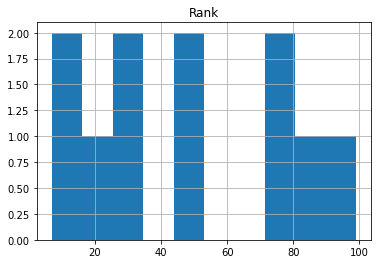

In [32]:
uni_df.hist()

By looking at the histogram, it can easily be seen that this looks more like a potential categorical variable. In second step, investigate the min, max, total, mean & median value of variable before converting it into categorical variable

In [33]:
 uni_df['Rank'].describe()

count    11.000000
mean     48.454545
std      32.094746
min       7.000000
25%      25.500000
50%      45.000000
75%      76.500000
max      99.000000
Name: Rank, dtype: float64

### Convert Rank from continuous to categorical variable
***

This is critical step.

In [48]:
# Declare different category you're going to divide the data into.Here, 1-20 = top; 20-40 = high; and so on...
cat = (1, 20, 40, 60, 80, 100)

# Declare names for each category
cat_name = ['top', 'high', 'mid', 'low', 'bottom']

# Perform conversion in the dataframe using pandas CUT function. Pass the CAT values to BIN parameter. 
uni_df['RankName'] = pd.cut(uni_df['Rank'], bins = cat, labels = cat_name)

# Check the dataframe post conversion
uni_df

,Name,Rank,IsJob,RankName
0,Adam,7,yes,top
1,Bob,48,no,mid
2,Cindrella,22,yes,high
3,Danny,75,no,low
4,Enrich,33,yes,high
5,Fieby,78,no,low
6,George,9,yes,top
7,Henry,88,yes,bottom
8,Irk,45,no,mid
9,Jonny,29,yes,high


#### Next do encoding the categorical variable into numbers 
***

Let's encode our rank category class

In [56]:
# We need the LabelEncoder to encode our rank categoty values: top = 0, high = 1, and so on ... 
rank_name_encoder = LabelEncoder()

# Cast the column to a string. You can do this in the corresponding lambda function
uni_df['RankCode'] = rank_name_encoder.fit_transform(uni_df['RankName'])

# Check the output
uni_df

,Name,Rank,IsJob,RankName,RankCode
0,Adam,7,yes,top,4
1,Bob,48,no,mid,3
2,Cindrella,22,yes,high,1
3,Danny,75,no,low,2
4,Enrich,33,yes,high,1
5,Fieby,78,no,low,2
6,George,9,yes,top,4
7,Henry,88,yes,bottom,0
8,Irk,45,no,mid,3
9,Jonny,29,yes,high,1


#### Next do encoding for the Label field i.e. IsJob
***

Let's encode IsJob field

In [59]:
# We need the LabelEncoder to encode our rank categoty values: No = 0, Yes = 1 
job_encoder = LabelEncoder()

# Cast the column to a string. You can do this in the corresponding lambda function
uni_df['IsJobLabel'] = rank_name_encoder.fit_transform(uni_df['IsJob'])

# Check the output
uni_df

,Name,Rank,IsJob,RankName,RankCode,IsJobLabel
0,Adam,7,yes,top,4,1
1,Bob,48,no,mid,3,0
2,Cindrella,22,yes,high,1,1
3,Danny,75,no,low,2,0
4,Enrich,33,yes,high,1,1
5,Fieby,78,no,low,2,0
6,George,9,yes,top,4,1
7,Henry,88,yes,bottom,0,1
8,Irk,45,no,mid,3,0
9,Jonny,29,yes,high,1,1


### Check the dataset types and other info
***

In [60]:
uni_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Name        11 non-null     object  
 1   Rank        11 non-null     int64   
 2   IsJob       11 non-null     object  
 3   RankName    11 non-null     category
 4   RankCode    11 non-null     int32   
 5   IsJobLabel  11 non-null     int32   
dtypes: category(1), int32(2), int64(1), object(2)
memory usage: 691.0+ bytes


## Now dataset is ready for training
***

Extract only the required data fields in a new frame

In [62]:
df = uni_df[['Name', 'RankCode', 'IsJobLabel']]
df

,Name,RankCode,IsJobLabel
0,Adam,4,1
1,Bob,3,0
2,Cindrella,1,1
3,Danny,2,0
4,Enrich,1,1
5,Fieby,2,0
6,George,4,1
7,Henry,0,1
8,Irk,3,0
9,Jonny,1,1


***
<h1 style="text-align: center">End of Program</h1>

***